# Natural Language Processing(NLP)
* Broad topic that we can only touch on
* Typically involves ingesting text for analysis or modeling
* Commonly used NLP libraries
    * [NLTK](https://www.nltk.org/) -- partially installed with Anaconda
    * [Beautiful soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) -- html parser
    * [Wordcloud](https://pypi.org/project/wordcloud/)

In [ ]:
from bs4 import BeautifulSoup as bs # no, the pun is not lost 
import requests
from wordcloud import WordCloud, STOPWORDS

In [ ]:
url ="https://alphabench.com/data/python-loan-analysis.html"

data = requests.get(url).text


In [ ]:
# get raw html
data

In [10]:
# get the first paragraph, with and without tag

soup = bs(data, 'html.parser')
soup.p.text

"In the following video tutorials, we're going to be making a loan class to handle some of the common, repetitive tasks that are involved in loan analysis and then make an application based on the class. So when we're done, not only will you have a menu driven application, but you will also be able to import and use the class in your Python applications. You can download the code from Github."

In [11]:
# get the text of all hyperlinks
for link in soup.find_all('a'):
    print(link.text)

Follow @mjmacarty
Home
About
Programs
Contact
Publications
Resources
FAQ
You can download the code from Github
Skip down to the video tutorial
Get the notebooks here.


In [12]:
# get the URLs for all hyperlinks
for link in soup.find_all('a'):
    print(link.get('href'))

https://twitter.com/mjmacarty?ref_src=twsrc%5Etfw
../index.html
../about.html
../programs.html
../contact.html
../publications.html
../resources.html
../faq.html
https://github.com/mjmacarty/numpy_financial
#video
https://github.com/mjmacarty/numpy_financial


In [17]:
# get text in paragraphs
text = ''
for value in soup.find_all('p'):
    text += value.text

print(text)

In the following video tutorials, we're going to be making a loan class to handle some of the common, repetitive tasks that are involved in loan analysis and then make an application based on the class. So when we're done, not only will you have a menu driven application, but you will also be able to import and use the class in your Python applications. You can download the code from Github.Skip down to the video tutorialThe application will handle a number of common loan analysis tasks, very simply with minimal user inputs  the interest rate, the term and the amount of money we're borrowing. With just hose three inputs you can call payment, generate a summary and amortization table. You can always add functionality to your analyzer to make it better fit your needs.I have arbitrarily decided what a loan summary should look like, so if you don't like the summary I have come up with, you can add outputs to it as you see fit. Our class will also allow you see what happens if you pay a lit

In [22]:
#removing 

import re

def escape(text):
    pattern = re.compile(r'(\')')
    return pattern.sub("", text)

text = escape(text)
text

'In the following video tutorials, were going to be making a loan class to handle some of the common, repetitive tasks that are involved in loan analysis and then make an application based on the class. So when were done, not only will you have a menu driven application, but you will also be able to import and use the class in your Python applications. You can download the code from Github.Skip down to the video tutorialThe application will handle a number of common loan analysis tasks, very simply with minimal user inputs  the interest rate, the term and the amount of money were borrowing. With just hose three inputs you can call payment, generate a summary and amortization table. You can always add functionality to your analyzer to make it better fit your needs.I have arbitrarily decided what a loan summary should look like, so if you dont like the summary I have come up with, you can add outputs to it as you see fit. Our class will also allow you see what happens if you pay a little

In [24]:
# tokenize text from webpage
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+")
text = tokenizer.tokenize(text)

In [ ]:
text #as a list


str_text = " ".join(text) #text back as a string
print(str_text)

In [27]:
from nltk import ngrams, FreqDist

freqs = dict()
for ngram in 1,2,3,4:
    freqs[ngram] = FreqDist(ngrams(text, ngram))


### Word frequencies, bigrams, etc

In [28]:
freqs

{1: FreqDist({('to',): 45, ('the',): 44, ('and',): 25, ('a',): 24, ('you',): 23, ('we',): 23, ('will',): 22, ('of',): 14, ('loan',): 13, ('our',): 12, ...}),
 2: FreqDist({('we', 'will'): 9, ('going', 'to'): 8, ('amortization', 'table'): 7, ('to', 'the'): 6, ('you', 'will'): 5, ('be', 'able'): 5, ('able', 'to'): 5, ('you', 'can'): 5, ('will', 'be'): 5, ('NumPy', 'Financial'): 5, ...}),
 3: FreqDist({('be', 'able', 'to'): 5, ('you', 'will', 'be'): 3, ('will', 'be', 'able'): 3, ('were', 'going', 'to'): 2, ('but', 'you', 'will'): 2, ('you', 'will', 'also'): 2, ('the', 'amount', 'of'): 2, ('to', 'make', 'it'): 2, ('extra', 'every', 'month'): 2, ('able', 'to', 'see'): 2, ...}),
 4: FreqDist({('you', 'will', 'be', 'able'): 3, ('will', 'be', 'able', 'to'): 3, ('be', 'able', 'to', 'see'): 2, ('able', 'to', 'see', 'how'): 2, ('to', 'see', 'how', 'much'): 2, ('as', 'well', 'as', 'a'): 2, ('use', 'NumPy', 'Financial', 'to'): 2, ('NumPy', 'Financial', 'to', 'calculate'): 2, ('In', 'the', 'followin

### Sentiment Analysis

In [38]:
# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

sid.polarity_scores(str_text)

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/Users/julioberrocal/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


### Word Cloud

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

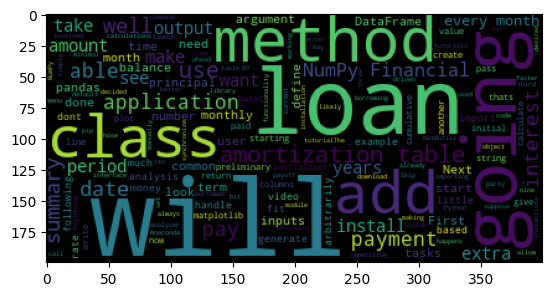

In [34]:
cloud = WordCloud(stopwords=STOPWORDS).generate(str_text)
plt.imshow(cloud)